In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [86]:
presc = pd.read_csv('../data_prep/depression_V4.csv.gz', compression='gzip')
wards = pd.read_csv('../data_prep/Wards.csv')

In [87]:
LSOA_London = pd.read_csv('../mappings/2015_england_pop.csv', thousands=',')

In [88]:
presc['YYYYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912])

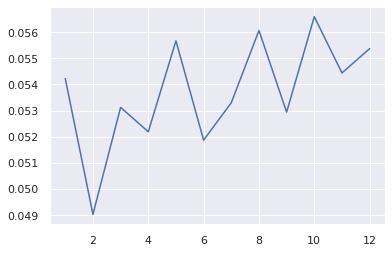

In [89]:
year = []
value = []
month = 1
for name , group in presc.groupby('YYYYMM'):
    year.append(month)
    value.append(sum(group['Total_items'])/sum(group['Patient_count']))
    month+=1
plt.plot(year,value)

In [90]:
LSOA_London.head()

,Area Codes,All Ages
0,E06000047,519695
1,E01020634,1521
2,E01020635,1307
3,E01020636,1748
4,E01020654,1845


In [91]:
# LSOA_London = LSOA_London[['Lower Super Output Area','Total_pop']].copy()

In [92]:
presc_sub = presc[presc['YYYYMM'] == 201901]

In [93]:
presc_sub.head()

,YYYYMM,LSOA_CODE,Total_quantity,Dosage_ratio,Total_cost,Total_items,Patient_count
0,201901,E01012190,5528.443524,28890.507539,325.828615,144.748521,1414.0
1,201901,E01012191,6304.076418,33211.748735,371.863143,165.890416,1618.0
2,201901,E01012192,5980.935350,32829.680515,350.484745,150.165290,1511.0
3,201901,E01012194,5704.954893,31238.477543,335.243875,143.202664,1480.0
4,201901,E01012195,6256.477717,34736.725948,367.127907,157.295769,1624.0


In [94]:
presc_merged = pd.merge(presc_sub,LSOA_London , left_on='LSOA_CODE',right_on='Area Codes')

presc_merged.corr()

,YYYYMM,Total_quantity,Dosage_ratio,Total_cost,Total_items,Patient_count,All Ages
YYYYMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_quantity,NaN,1.000000,0.938534,0.887845,0.949357,0.219005,0.251983
Dosage_ratio,NaN,0.938534,1.000000,0.901984,0.888351,0.277820,0.292383
Total_cost,NaN,0.887845,0.901984,1.000000,0.838581,0.257356,0.275744
Total_items,NaN,0.949357,0.888351,0.838581,1.000000,0.225111,0.251327
Patient_count,NaN,0.219005,0.277820,0.257356,0.225111,1.000000,0.847144
All Ages,NaN,0.251983,0.292383,0.275744,0.251327,0.847144,1.000000


In [96]:
np.corrcoef(presc_merged['All Ages'], presc_merged['Patient_count'])

array([[1.       , 0.8471435],
       [0.8471435, 1.       ]])

In [100]:
mappings_dir = '../mappings/'
def loadLSOA_mappings():
    LSOA_dist_old = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST.json','rb'))
    LSOA_dist_2021 = json.load(open(mappings_dir + 'GP_LSOA_PATIENTSDIST_2021.json','rb'))
    return [LSOA_dist_old , LSOA_dist_2021]

In [101]:
old , new = loadLSOA_mappings()

In [102]:
# old['Y00185']

1.3862943611198906 9.876886870738948 7.456454555176209 7.489229805361268 0.247456180229873


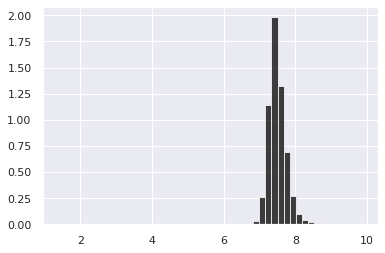

In [103]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

0.030223316729165506 877.0764782707762 94.2891677513306 99.3123144430417 55.91511357067573


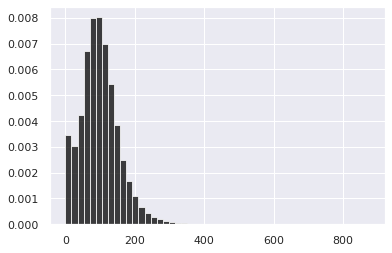

In [104]:
# the histogram of the data
data = (presc['Total_items'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

0.08053934292270669 3028.2840845115497 264.1707895584235 271.4031982855097 147.35390944773596


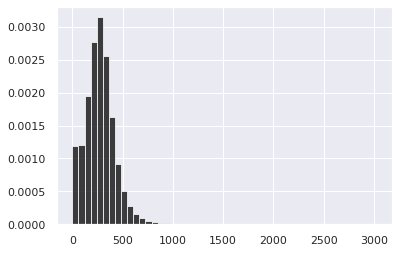

In [105]:
# the histogram of the data
data = (presc['Total_cost'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [106]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London,E01000104,1811
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London,E01000105,2349
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London,E01000106,2144


In [107]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [108]:
london_LSOAs

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London,E01000104,1811
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London,E01000105,2349
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London,E01000106,2144
3,3,E01000107,E05000041,Village,E09000002,Barking and Dagenham,London,E01000107,1696
4,4,E01000108,E05000041,Village,E09000002,Barking and Dagenham,London,E01000108,1736
...,...,...,...,...,...,...,...,...,...
32911,32911,E01033742,E05000221,Glyndon,E09000011,Greenwich,London,E01033742,1627
32923,32923,E01033743,E05000228,Thamesmead Moorings,E09000011,Greenwich,London,E01033743,2082
32931,32931,E01033744,E05000221,Glyndon,E09000011,Greenwich,London,E01033744,1917
32939,32939,E01033745,E05000228,Thamesmead Moorings,E09000011,Greenwich,London,E01033745,1996


In [109]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [110]:
London_preac['YYYYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912])

In [111]:
# London_preac.sort_values(by=['YYYYMM'],inplace=True)

In [112]:
from tqdm import tqdm
area_dict = {'YYYYMM':[], 'mean_cost':[] , 'mean_items' : [] , 'mean_quantity' : []}
for name , group in tqdm(London_preac.groupby('YYYYMM')):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_cost'].append((np.sum(group['Total_cost'])/np.sum(group['Patient_count'])+1)*1000)
    area_dict['mean_items'].append((np.sum(group['Total_items'])/np.sum(group['Patient_count'])+1)*1000)
    area_dict['mean_quantity'].append((np.sum(group['Dosage_ratio'])/np.sum(group['Patient_count'])+1)*1000)
print(area_dict)
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

100%|██████████| 12/12 [00:00<00:00, 303.26it/s]

{'YYYYMM': [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912], 'mean_cost': [1089.0611560203115, 1076.0353688725982, 1086.2436623240685, 1072.7715663282738, 1081.124712439051, 1072.7406123631706, 1074.1910451631902, 1077.6240301187192, 1078.357112702365, 1084.6295945498146, 1083.4901584834167, 1085.8023153153176], 'mean_items': [1026.2321545901139, 1023.788638140716, 1025.7437447653313, 1025.2174659596878, 1027.1704306455943, 1025.1581972569948, 1026.742426246156, 1026.2261522701615, 1025.824555306953, 1027.6421195535827, 1026.454199192367, 1026.6419788078642], 'mean_quantity': [7102.914570495295, 6447.053077039338, 7088.55660315671, 6833.306220881569, 7661.084038594614, 6824.800879068601, 7331.254882218709, 7113.362522337461, 7167.72234952867, 7448.649445725048, 7216.751384314351, 7336.18315319785]}


6447.053077039338 7661.084038594614 7140.5424359330655 7130.969927213185 306.3030114230298


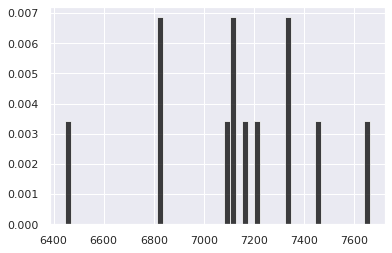

In [113]:
data = (area_df['mean_quantity'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


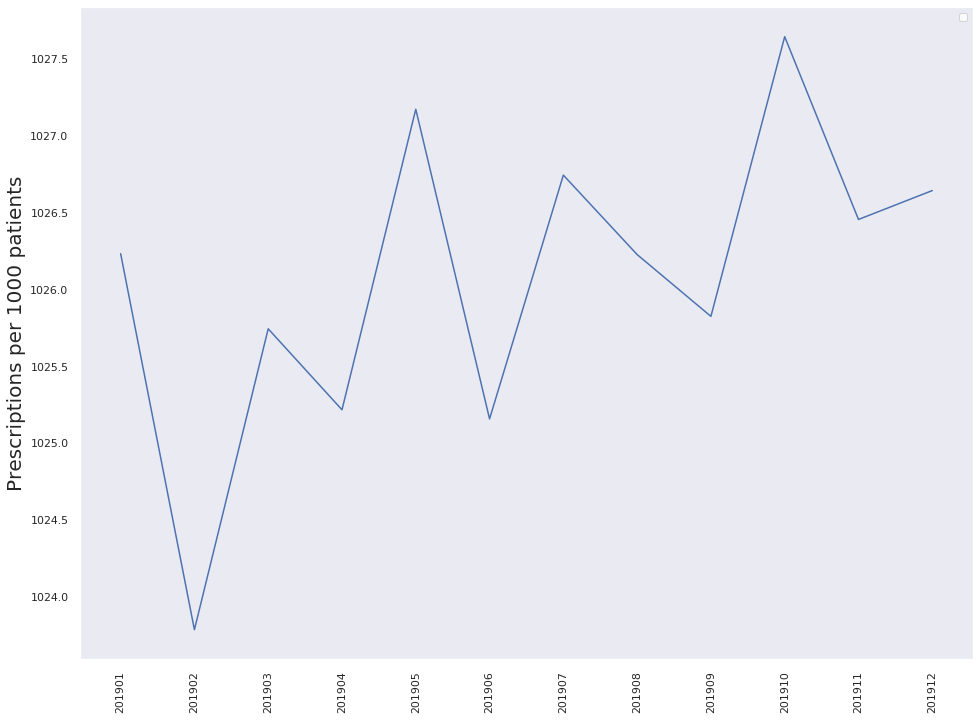

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.grid(False)
# plt.title("Anti allergic prescriptions",fontsize=20)
sns.lineplot(y=area_df['mean_items'],x=np.arange(0,len(area_df),1))
plt.ylabel("Prescriptions per 1000 patients",fontsize=20)
# sns.lineplot(y=area_df['mean_cost'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)
ax.legend()

No handles with labels found to put in legend.


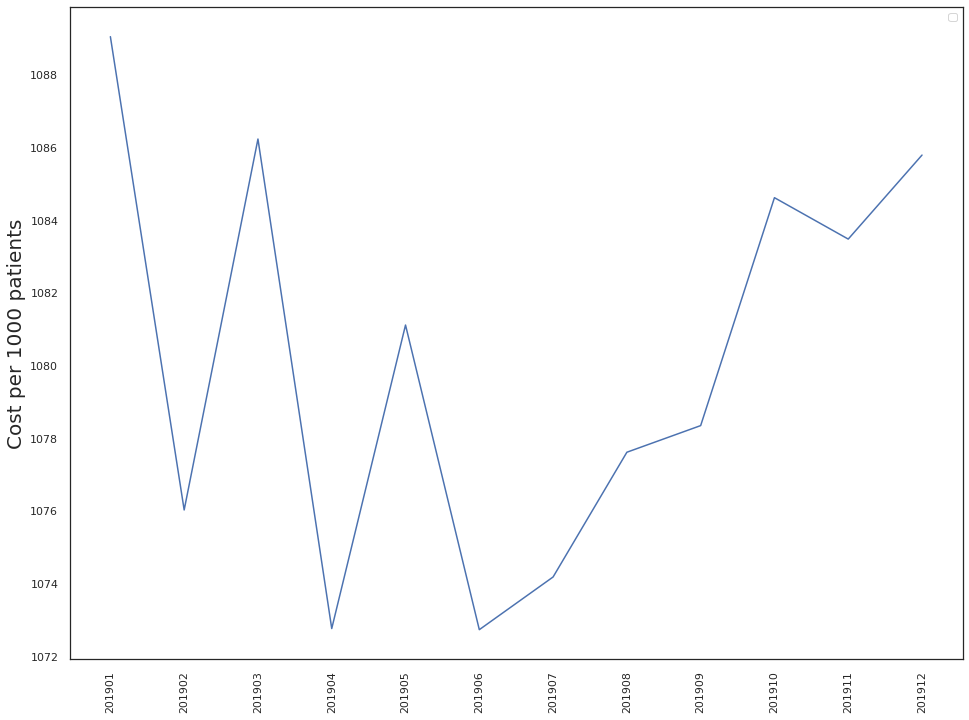

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.grid(False)
# plt.title("Anti allergic prescriptions",fontsize=20)

sns.lineplot(y=area_df['mean_cost'],x=np.arange(0,len(area_df),1))
plt.ylabel("Cost per 1000 patients",fontsize=20)
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)
ax.legend()

In [117]:
presc_sub = presc[(presc['YYYYMM'] >= 201901) & (presc['YYYYMM'] <= 201912)]

In [118]:
# presc_sub.head(n=10)

In [119]:
presc_sub_wards = pd.merge(presc_sub , wards , left_on='LSOA_CODE', right_on='LSOA11CD')

In [120]:
presc_sub_wards.head(n=5)

,YYYYMM,LSOA_CODE,Total_quantity,Dosage_ratio,Total_cost,Total_items,Patient_count,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,201901,E01012190,5528.443524,28890.507539,325.828615,144.748521,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
1,201902,E01012190,4867.736403,24351.929380,293.234617,126.153511,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
2,201903,E01012190,5135.706220,26068.812634,294.658394,135.826435,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
3,201904,E01012190,5222.461681,25569.490324,272.943628,138.649881,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
4,201905,E01012190,5411.764705,30640.442119,287.215924,146.658576,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436


In [121]:
lsoa_dict = {'LSOA_CODE': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('LSOA_CODE'):
    lsoa_dict['LSOA_CODE'].append(name)
    lsoa_dict['Patients'].append(np.log(group.iloc[1]['All Ages']))
    lsoa_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
lsoa_df = pd.DataFrame.from_dict(lsoa_dict)

In [122]:
lsoa_df.head(n=5)

,LSOA_CODE,Total_OME,Patients
0,E01000001,2.049218,7.401842
1,E01000002,2.567682,7.252762
2,E01000003,3.226911,7.437206
3,E01000005,3.159189,7.315218
4,E01000006,5.915800,7.532624


In [123]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(lsoa_df['Total_OME'], lsoa_df['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=lsoa_df['Total_OME'],y=lsoa_df['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.10741487951774552, 7.541199941017977e-85)
0.02316844158593957 7.241028847773992 0.10741487951774556 7.541199940588119e-85 0.0011835056065160102


Text(0.1, 0.7, '$R^2$: 0.01')

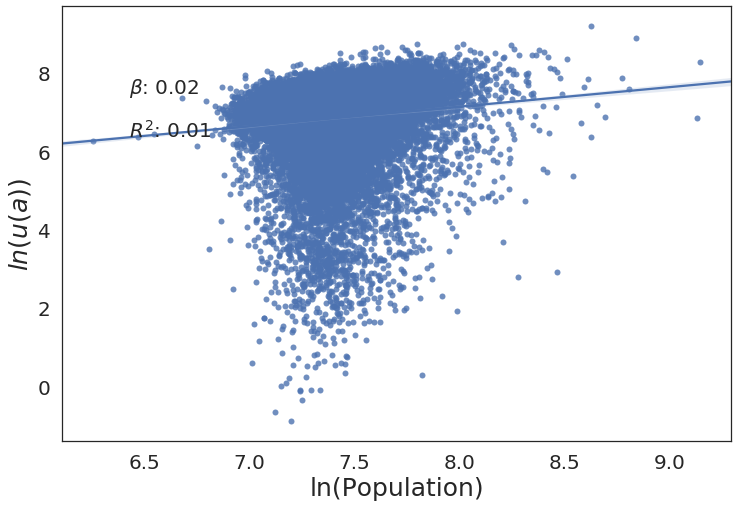

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=lsoa_df['Patients'],y=lsoa_df['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(predict_dosage , gt_dosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)

In [125]:
presc_sub_wards.head(n=4)

,YYYYMM,LSOA_CODE,Total_quantity,Dosage_ratio,Total_cost,Total_items,Patient_count,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName,Area Codes,All Ages
0,201901,E01012190,5528.443524,28890.507539,325.828615,144.748521,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
1,201902,E01012190,4867.736403,24351.929380,293.234617,126.153511,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
2,201903,E01012190,5135.706220,26068.812634,294.658394,135.826435,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436
3,201904,E01012190,5222.461681,25569.490324,272.943628,138.649881,1414.0,11702,E01012190,E05001534,Fairfield,E06000004,Stockton-on-Tees,Stockton-on-Tees,E01012190,1436


In [126]:
la_dict = {'LA_CODE': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('LAD15CD'):
    la_dict['LA_CODE'].append(name)
    la_dict['Patients'].append(np.log(sum(group['All Ages'])/12))
    la_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
la_df = pd.DataFrame.from_dict(la_dict)

In [127]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(la_df['Total_OME'], la_df['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=la_df['Total_OME'],y=la_df['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.7288607935190843, 2.997783370336319e-55)
0.6196113990367729 4.729400885018497 0.728860793519084 2.9977833703368886e-55 0.03233541785159548


Text(0.1, 0.7, '$R^2$: 0.53')

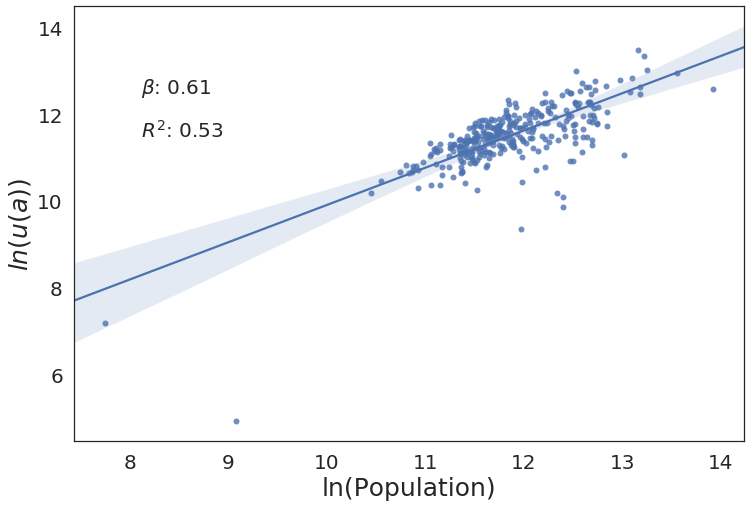

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=la_df['Patients'],y=la_df['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(predict_dosage , gt_dosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)

In [129]:
city_dict = {'City': [] , 'Total_OME' : [] , 'Patients' : [] }
for name , group in presc_sub_wards.groupby('CityName'):
    city_dict['City'].append(name)
    city_dict['Patients'].append(np.log(sum(group['All Ages'])))
    city_dict['Total_OME'].append(np.log(sum(group['Total_items'])))
city_df = pd.DataFrame.from_dict(city_dict)

In [130]:
# city_dict['City']

In [131]:
max(city_df['Patients']) , min(city_df['Patients'])

(18.456615834585445, 13.63334098961949)

In [132]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': x, 'y':  y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=15)

In [133]:
city_df_sub = city_df[~city_df['City'].isin(['Bath','Scunthorpe','Grimsby'])]

In [134]:
from scipy.stats import linregress
from scipy.stats import pearsonr

corr = pearsonr(city_df_sub['Total_OME'], city_df_sub['Patients'])
print(corr)

slope_dosage, intercept_dosage, r_value_dosage, p_value_dosage, std_err_dosage = linregress(x=city_df_sub['Total_OME'],y=city_df_sub['Patients'])

print(slope_dosage,  intercept_dosage , r_value_dosage , p_value_dosage , std_err_dosage)

(0.7976376648097505, 1.4174803649449614e-24)
0.7915458528586878 5.255501473871105 0.7976376648097505 1.4174803649449618e-24 0.05869075218741258


Text(0.1, 0.7, '$R^2$: 0.63')

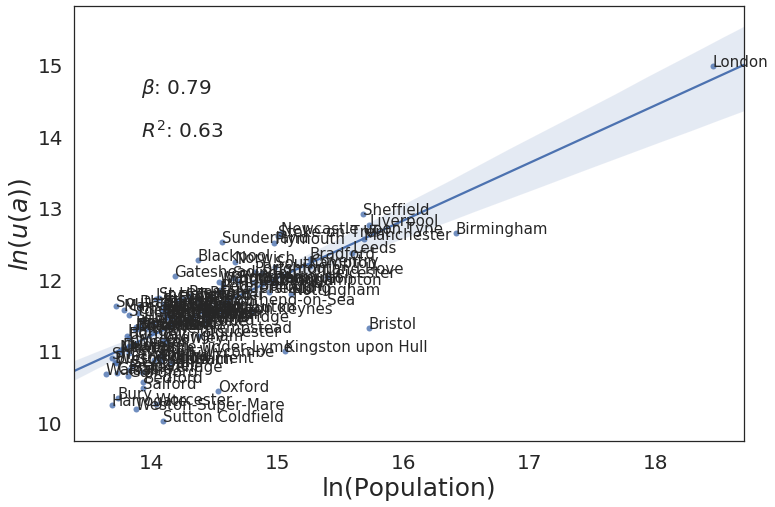

In [135]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=city_df_sub['Patients'],y=city_df_sub['Total_OME'],ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("$ln({u}(a))$",fontsize=25)
# ax.set_title("Opioids",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
label_point(city_df_sub['Patients'] , city_df_sub['Total_OME'] , city_df_sub['City'] , ax)
ax.annotate(r"$\beta$" +": " +  str(r_value_dosage)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value_dosage**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)